In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import KFold, cross_val_score
from sklearn import svm
from sklearn.metrics import accuracy_score

%matplotlib inline


In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# obtain features
with open('/content/gdrive/My Drive/features.txt') as feature_file:
  names = feature_file.readlines()
  names = map(lambda x: x.strip(), names)
  names = list(names)

# split data
X_train = pd.read_csv('/content/gdrive/My Drive/X_train.txt', header=None, delimiter=r"\s+", names=names)
X_test = pd.read_csv('/content/gdrive/My Drive/X_test.txt', header=None, delimiter=r"\s+", names=names)
y_train = pd.read_csv('/content/gdrive/My Drive/y_train.txt', header=None)
y_test = pd.read_csv('/content/gdrive/My Drive/y_test.txt', header=None)

/usr/local/lib/python3.6/dist-packages/pandas/io/parsers.py:709: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
X_train.head(4)

,"'tBodyAcc-mean()-X',","'tBodyAcc-mean()-Y',","'tBodyAcc-mean()-Z',","'tBodyAcc-std()-X',","'tBodyAcc-std()-Y',","'tBodyAcc-std()-Z',","'tBodyAcc-mad()-X',","'tBodyAcc-mad()-Y',","'tBodyAcc-mad()-Z',","'tBodyAcc-max()-X',",...,"'fBodyBodyGyroJerkMag-meanFreq()',","'fBodyBodyGyroJerkMag-skewness()',","'fBodyBodyGyroJerkMag-kurtosis()',","'angle(tBodyAccMean,gravity)',","'angle(tBodyAccJerkMean),gravityMean)',","'angle(tBodyGyroMean,gravityMean)',","'angle(tBodyGyroJerkMean,gravityMean)',","'angle(X,gravityMean)',","'angle(Y,gravityMean)',","'angle(Z,gravityMean)',"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663


In [0]:
# for my sanity, label y column
y_train.columns = ['label']
y_test.columns = ['label']

y_train_fin = y_train.values.ravel()
y_test_fin = y_test.values.ravel()

In [0]:
# scale our data
scaler = StandardScaler()
X_train_fin = scaler.fit_transform(X_train)
X_test_fin = scaler.transform(X_test)

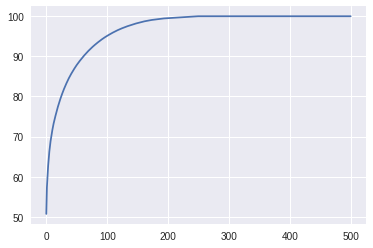

In [7]:
# get appropriate number of components for PCA
pca_test = PCA(n_components=500)

pca_test.fit(X_train_fin)

# amount of variance that each component explains
var = pca_test.explained_variance_ratio_

# cumulative variance explained
var1 = np.cumsum(np.round(pca_test.explained_variance_ratio_, decimals=4)*100)

# print(var1)

plt.plot(var1)


In [0]:
# apply PCA
pca = PCA(n_components=250)
pca.fit(X_train_fin)
X_train_fin = pca.transform(X_train_fin)
X_test_fin = pca.transform(X_test_fin)

In [9]:
# train SVMs
svc_linear = svm.SVC(kernel='linear')
svc_gaussian = svm.SVC(kernel='rbf')
svc_poly = svm.SVC(kernel='poly')

k_fold = KFold(n_splits=5)

scores_linear = np.array([svc_linear.fit(X_train_fin[train], y_train_fin[train]).score(X_train_fin[test], y_train_fin[test]) 
for train, test in k_fold.split(X_train_fin)])

scores_gaussian = np.array([svc_gaussian.fit(X_train_fin[train], y_train_fin[train]).score(X_train_fin[test], y_train_fin[test]) 
for train, test in k_fold.split(X_train_fin)])

scores_poly = np.array([svc_poly.fit(X_train_fin[train], y_train_fin[train]).score(X_train_fin[test], y_train_fin[test]) 
for train, test in k_fold.split(X_train_fin)])

print("Scores for linear SVM ", scores_linear)
print("Train accuracy LINEAR: %0.2f (+/- %0.2f)" % (scores_linear.mean(), scores_linear.std()/2))
print("Scores for gaussian SVM ", scores_gaussian)
print("Train accuracy GAUSSIAN: %0.2f (+/- %0.2f)" % (scores_gaussian.mean(), scores_gaussian.std()/2))
print("Scores for polynomial SVM ", scores_poly)
print("Train accuracy POLY: %0.2f (+/- %0.2f)" % (scores_poly.mean(), scores_poly.std()/2))

# print("Train accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()/2)) 
  
  

Scores for linear SVM  [0.92522094 0.89870836 0.9292517  0.94557823 0.95918367]
Train accuracy LINEAR: 0.93 (+/- 0.01)
Scores for gaussian SVM  [0.91026513 0.88103331 0.9122449  0.88639456 0.95034014]
Train accuracy GAUSSIAN: 0.91 (+/- 0.01)
Scores for polynomial SVM  [0.9157036  0.90074779 0.93877551 0.93333333 0.93741497]
Train accuracy POLY: 0.93 (+/- 0.01)


In [0]:
# from sklearn.model_selection import validation_curve

# C_params = np.logspace(-6, 3, 10)

# train_scores, test_scores = validation_curve(
#   svc, X_train_fin, y_train_fin,
#   param_name="C", param_range=C_params,
#   cv=5, scoring="accuracy", n_jobs=-1, verbose=2)

In [0]:
y_pred1 = svc_linear.predict(X_test_fin)
y_pred2 = svc_gaussian.predict(X_test_fin)
y_pred3 = svc_poly.predict(X_test_fin)

In [12]:
print("Test accuracy:")
print("Linear ", accuracy_score(y_test_fin, y_pred1))
print("Gaussian ", accuracy_score(y_test_fin, y_pred2))
print("Poly ", accuracy_score(y_test_fin, y_pred3))

Test accuracy:
Linear  0.9511367492365117
Gaussian  0.9423142178486597
Poly  0.9226331862911435


In [15]:
svc_linear.fit(X_train_fin, y_train_fin)

crosstab = pd.crosstab(y_test_fin.flatten(), svc_linear.predict(X_test_fin),
                      rownames=['True'], colnames=['Predicted'],
                      margins=True)
crosstab

Predicted,1,2,3,4,5,6,All
True,,,,,,,
1,495,0,1,0,0,0,496
2,15,455,1,0,0,0,471
3,6,15,399,0,0,0,420
4,0,2,0,433,56,0,491
5,0,0,0,17,515,0,532
6,0,0,0,0,0,537,537
All,516,472,401,450,571,537,2947
